In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn

In [2]:
df = pd.read_csv("housing.data", delim_whitespace=True)

In [3]:
col_name = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [4]:
df.columns = col_name

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


### CRIM      per capita crime rate by town
### ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
### INDUS     proportion of non-retail business acres per town
### CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
### NOX       nitric oxides concentration (parts per 10 million)
### RM        average number of rooms per dwelling
### AGE       proportion of owner-occupied units built prior to 1940
### DIS       weighted distances to five Boston employment centres
### RAD       index of accessibility to radial highways
### TAX      full-value property-tax rate per 10,000 dollars
### PTRATIO pupil-teacher ratio by town
### B 1000(Bk -##63)^2 where Bk is the proportion of blacks by town
### LSTAT % lower status of the population
### MEDV     Median value of owner-occupied homes in 1000's dollars


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sbn

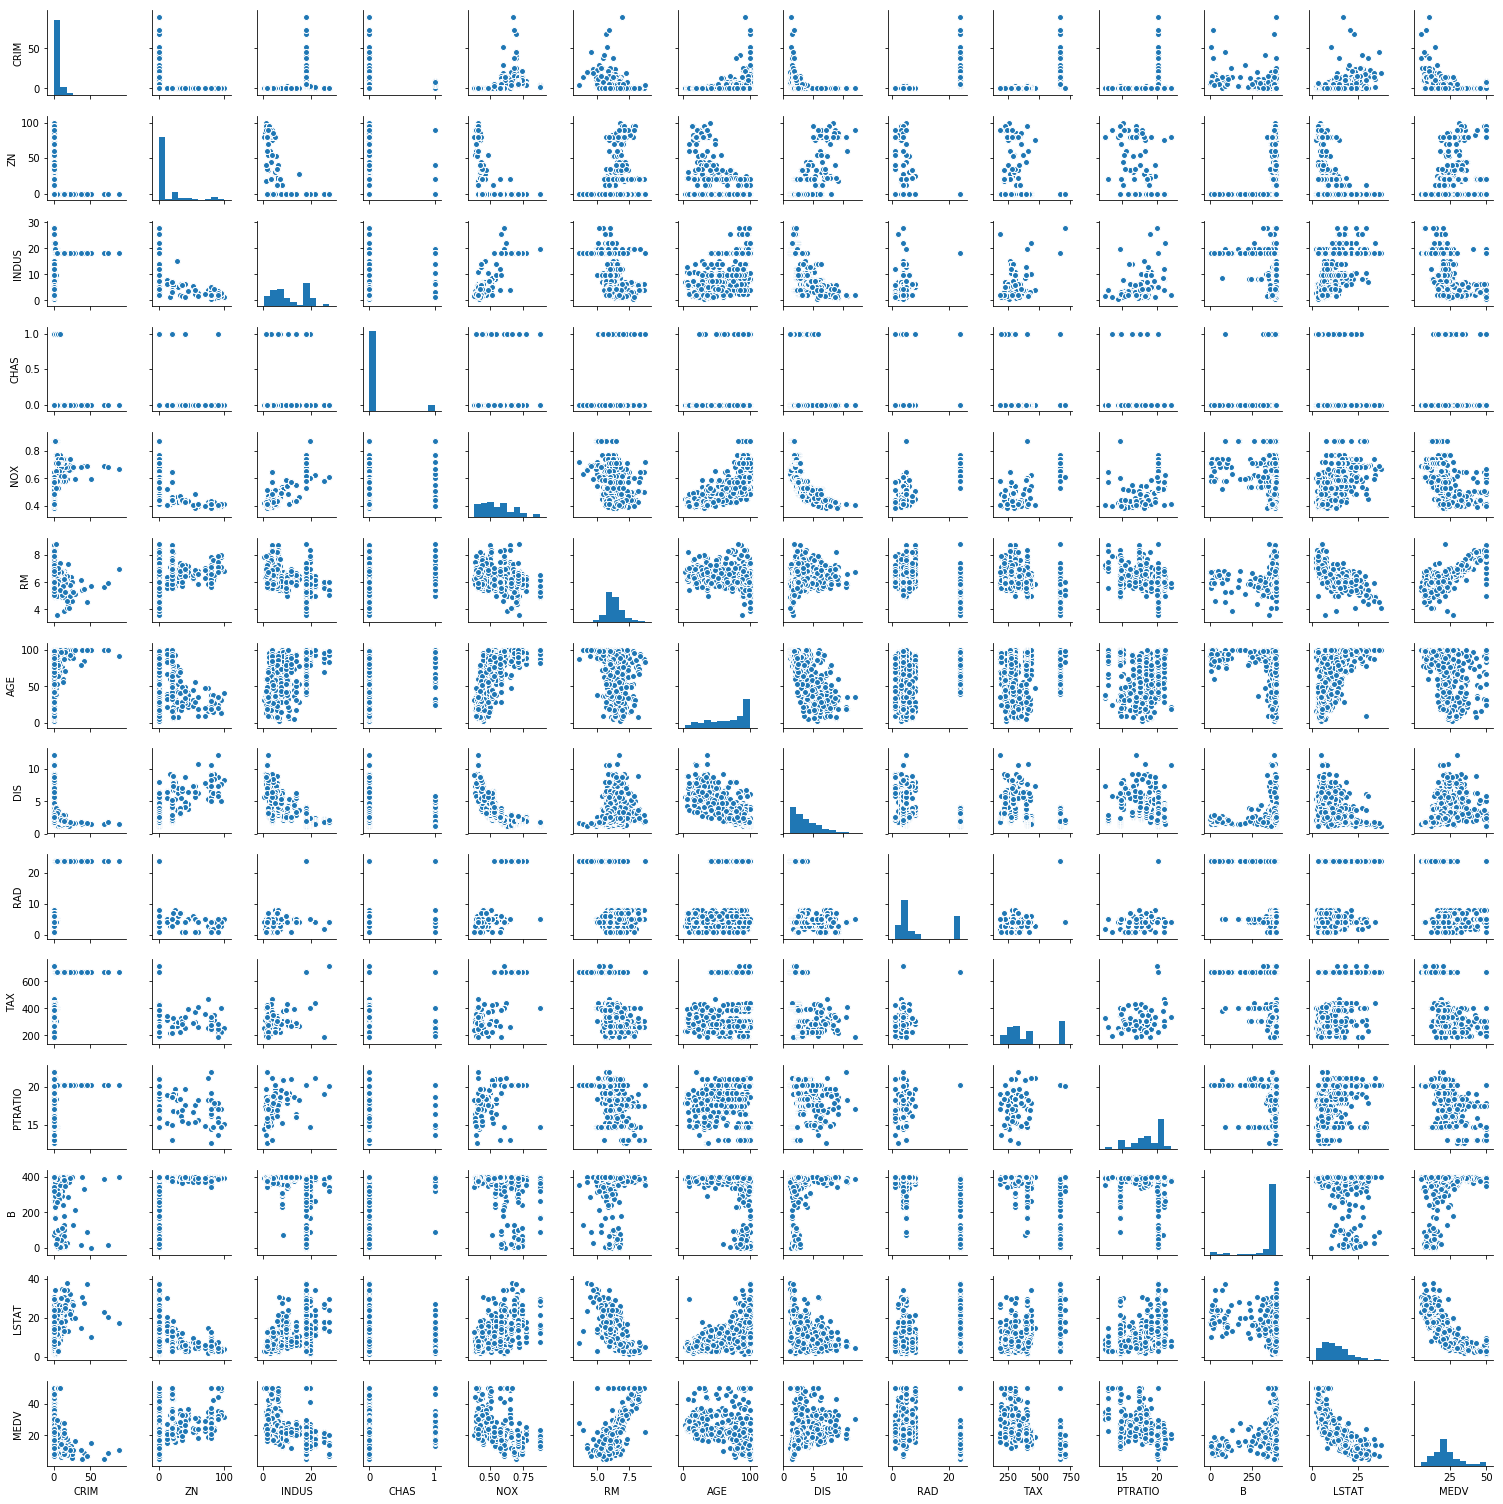

In [8]:
sbn.pairplot(df,size=1.5)

In [9]:
 col_sh = ['CRIM','ZN','INDUS','CHAS','MEDV']

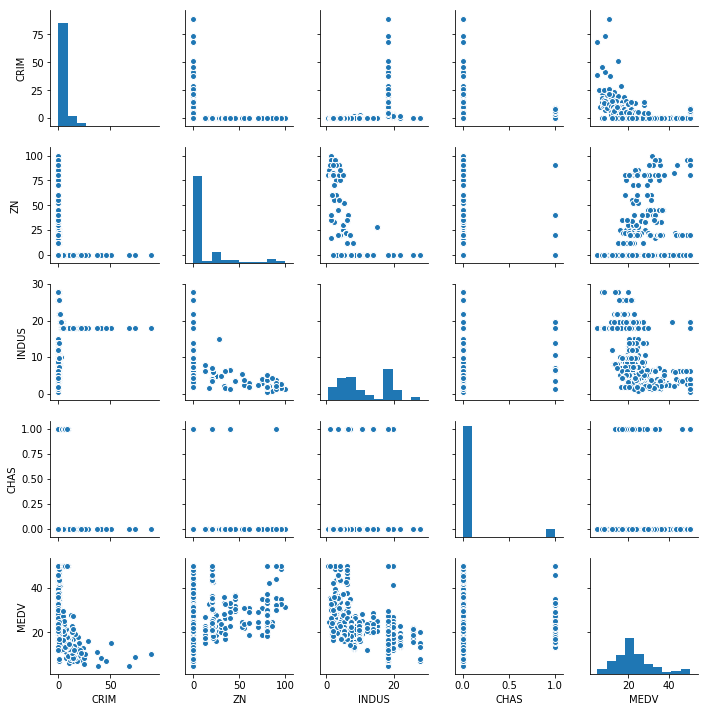

In [10]:
sbn.pairplot(df[col_sh],size=2)

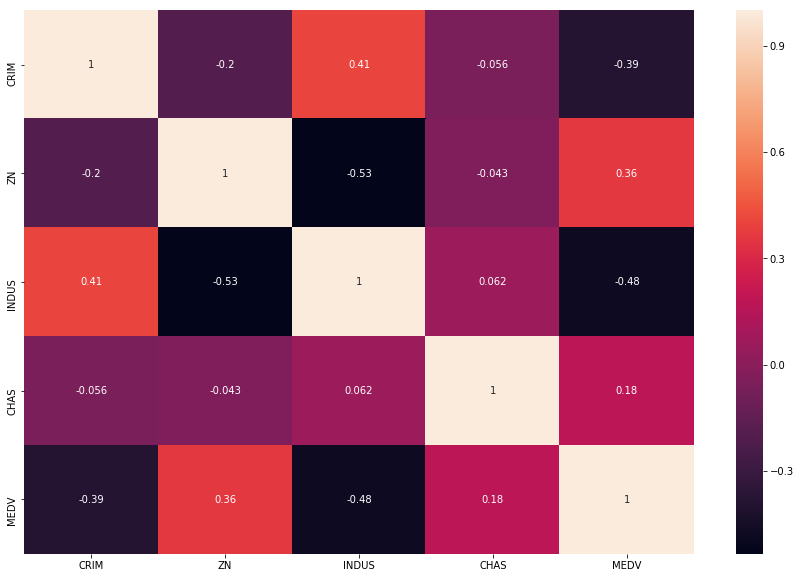

In [11]:
plt.figure(figsize=(15,10))
sbn.heatmap(df[col_sh].corr(),annot=True)
plt.show()

## Linear regression

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [13]:
X = df['LSTAT'].values.reshape(-1,1)
y= df['MEDV'].values

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
model.coef_

array([-0.95179166])

In [18]:
model.intercept_

34.5874427086184

Text(0,0.5,'Median value of owner-occupied homes in $1000s')

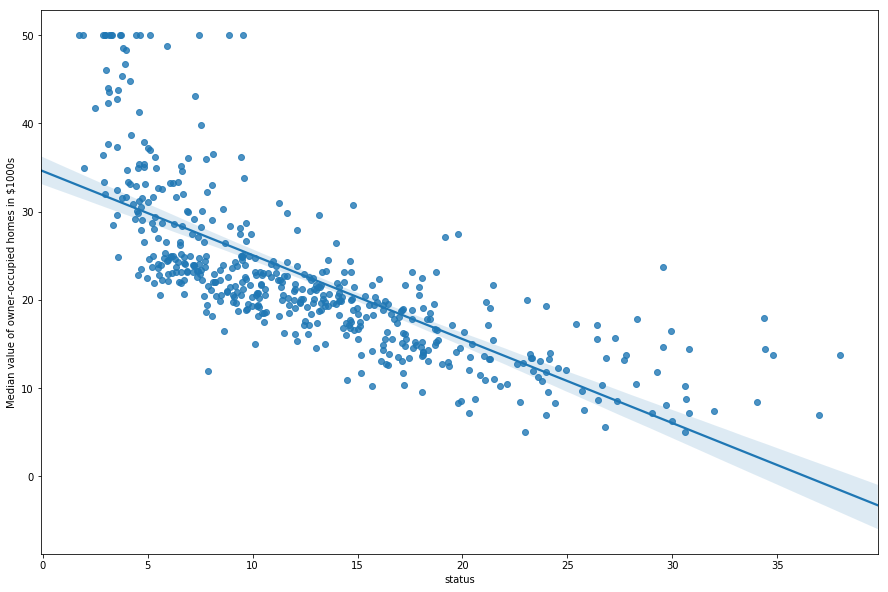

In [19]:
plt.figure(figsize=(15,10))
sbn.regplot(X,y)
plt.xlabel('status')
plt.ylabel('Median value of owner-occupied homes in $1000s')

In [20]:
X = df['LSTAT'].values.reshape(-1,1)
y= df['MEDV'].values

In [21]:
from sklearn.linear_model import RANSACRegressor

In [22]:
ransac  = RANSACRegressor()

In [23]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [29]:
inlier_mask = ransac.inlier_mask_
outlier = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_Y = ransac.predict(line_X.reshape(-1,1));

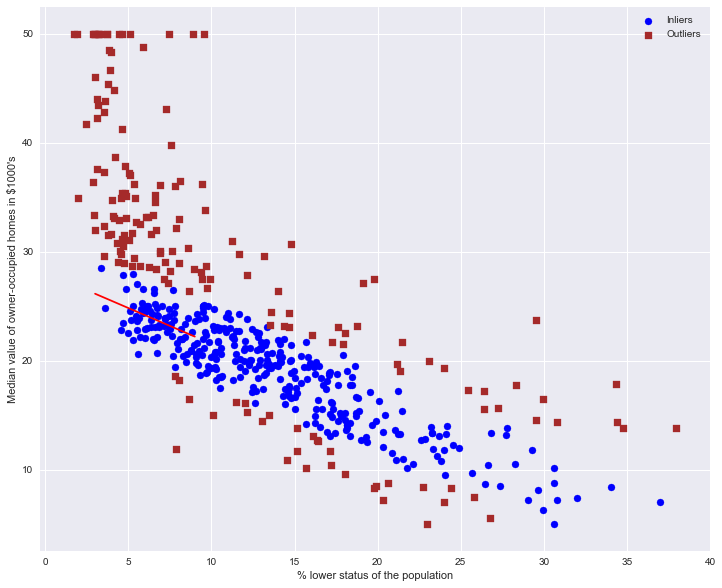

In [30]:
sbn.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier], y[outlier],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_Y, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

## Residual Analysis

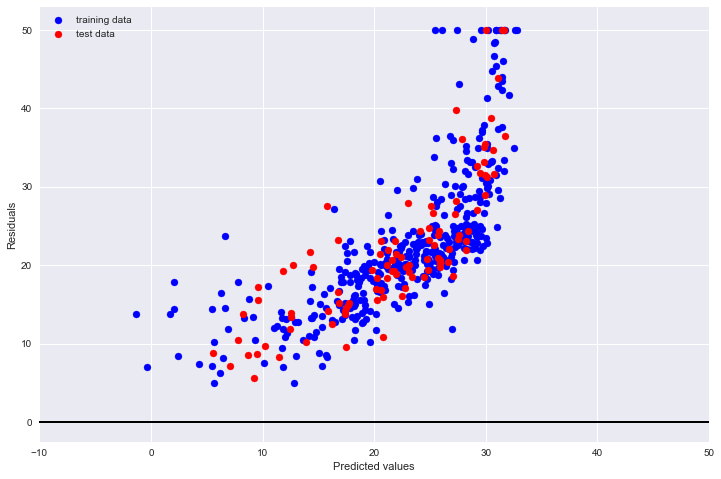

In [54]:
plt.figure(figsize=(12,8))
plt.scatter(Y_train_pred, y_train, c='blue', marker='o', label='training data')
plt.scatter(Y_test_pred, y_test, c='red', marker='o', label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='k')
plt.xlim([-10,50])
plt.show()

## Mean Squared Error 

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_train,Y_train_pred)

40.228932677496545

In [57]:
mean_squared_error(y_test,Y_test_pred)

31.5765207794909

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_test_pred)

0.6185650773522571

In [59]:
r2_score(y_train,Y_train_ pred)

0.5260167978185534